<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Lab 2.2.2

## Statistical Proof

### Part 1: Student's t-Test

The *t*-test is probably the most used statistical test. It measures the likelihood that a sample belongs to a given distribution, and incorporates a correction for the finite size of the sample.

#### Using the t-test to compare two means

Here, suppose we have two sets of measurements and we want to know if they both came from the same distribution.

For example, in [this](https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data) dataset these could be age of house in one group and median value of house in another group, and we are testing the null hypothesis that there is no difference between the two groups.

#### Collect Data

You can find the original data [here](https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data).

Data dictionary is available [here](https://www.cs.toronto.edu/~delve/data/boston/bostonDetail.html).

In [ ]:
import pandas as pd
import numpy as np
import math

from scipy import stats
from matplotlib import pyplot as plt
import statsmodels.api as sm
import seaborn as sns
sns.set(rc={'figure.figsize': (15, 10)})

import pandas as pd
pd.set_option("display.max_rows", 120)
pd.set_option("display.max_columns", 120)

%matplotlib inline

In [269]:
names = ["CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM", "AGE", "DIS", "RAD", "TAX", "PTRATIO", "B", "LSTAT", "MEDV"]
df= pd.read_csv("C:/Users/patri/OneDrive/UTS and personal doc 2022/Documents/Person Docs/Data science program/DATA/housing.data", header=None, names=names, sep='\s+')


In [270]:
# Head
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [147]:
# Tail
df.tail()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0
505,0.04741,0.0,11.93,0,0.573,6.030,80.8,2.5050,1,273.0,21.0,396.90,7.88,11.9


In [148]:
# Shape
df.shape

(506, 14)

##### 1. Plot Histogram of `RM`

<Figure size 800x600 with 0 Axes>

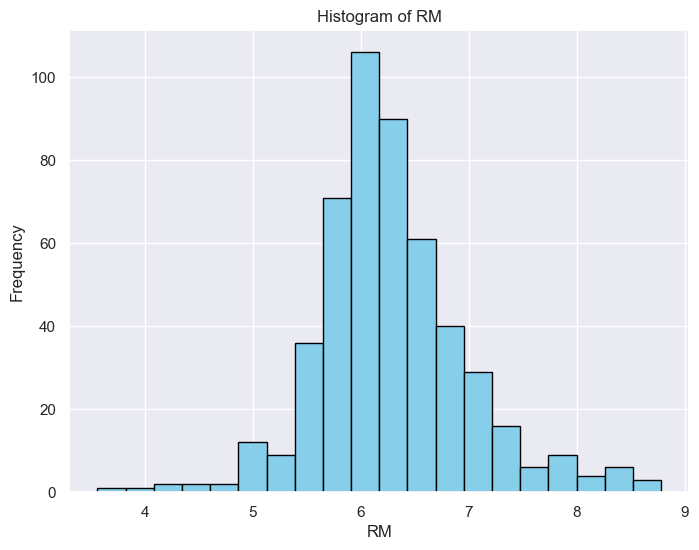

In [149]:
#  ANSWER
plt.figure(figsize=(8, 6))  # Set the figure size
plt.hist(df['RM'], bins=20, color='skyblue', edgecolor='black')  # Create the histogram

# Set plot titles and labels
plt.title('Histogram of RM')
plt.xlabel('RM')
plt.ylabel('Frequency')

# Display the plot
plt.show()

##### 2. Plot Histogram of `MEDV`

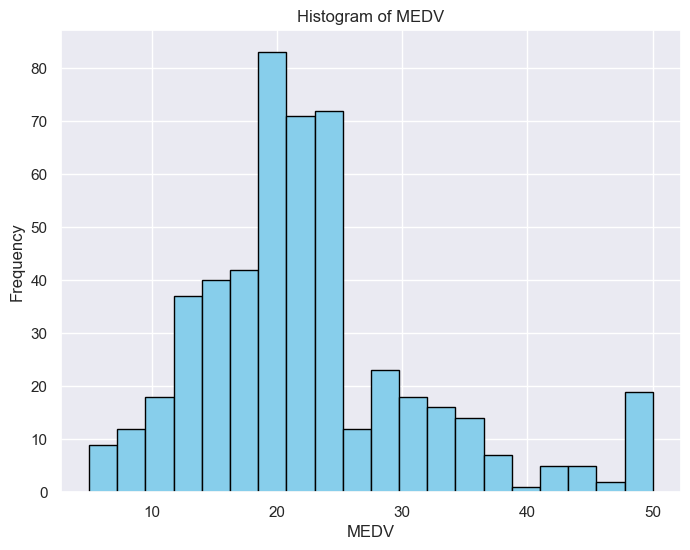

In [150]:
#  ANSWER
plt.figure(figsize=(8, 6))  # Set the figure size
plt.hist(df['MEDV'], bins=20, color='skyblue', edgecolor='black')  # Create the histogram

# Set plot titles and labels
plt.title('Histogram of MEDV')
plt.xlabel('MEDV')
plt.ylabel('Frequency')

# Display the plot
plt.show()

##### 3.A Draw Scatter Plot of `RM` & `MEDV`

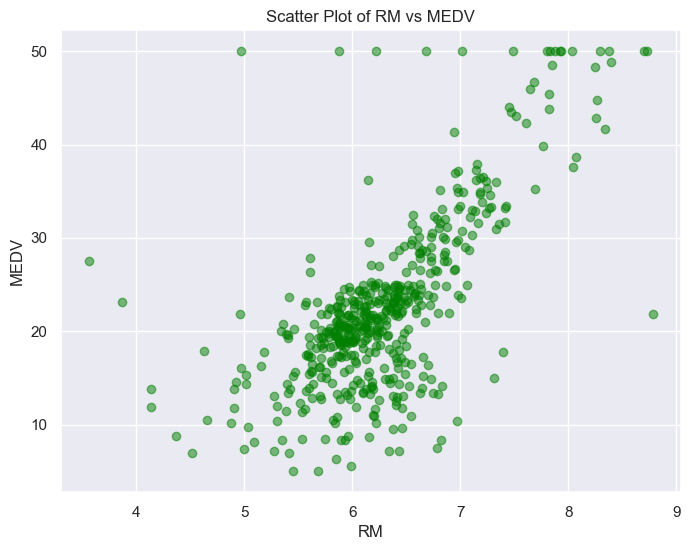

In [151]:
# ANSWER
# Plotting the scatter plot for 'RM' vs 'MEDV' (house price)
plt.figure(figsize=(8, 6))  # Set the figure size
plt.scatter(df['RM'], df['MEDV'], alpha=0.5, color='green')  # Scatter plot

# Set plot titles and labels
plt.title('Scatter Plot of RM vs MEDV')
plt.xlabel('RM')
plt.ylabel('MEDV')

# Display the plot
plt.show()

<Figure size 800x600 with 0 Axes>

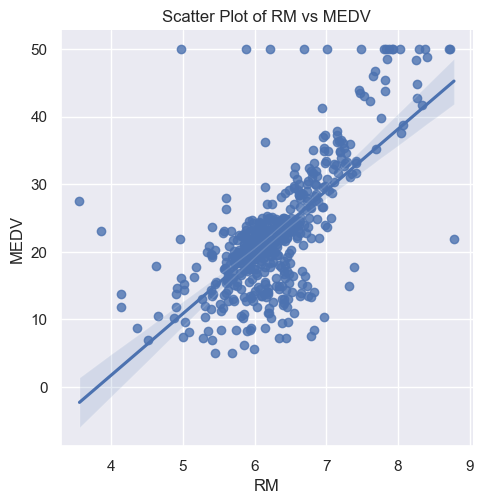

In [154]:
# ANSWER
## using seaborn and lmplot plot to check a trend/relationship between RM and MEDV
plt.figure(figsize=(8, 6))  # Set the figure size
sns.lmplot(x='RM', y='MEDV', data=df)  # Scatter plot with Seaborn

# Set plot titles and labels
plt.title('Scatter Plot of RM vs MEDV')
plt.xlabel('RM')
plt.ylabel('MEDV')

# Display the plot
plt.show()

##### 3.B Is there any trend? State your observation.

**ANSWER:**: ...
Observations:

    There is a Positive Correlation between RM and MEDV.
        The scatter plot shows a positive correlation between the number of rooms (RM) and the median house value (MEDV).
        As the number of rooms increases, the median house value (MEDV) also increases. This is indicated by the upward sloping regression line.

    Trend Line:
        The regression line fits the data well and shows a clear upward trend as the number of rooms increases.
        This suggests that larger homes with more rooms tend to have a higher median house price.

    Scatter of Points:
        There is a general clustering of data points along the regression line, with some degree of variability. This is common in real-world data, where there are other factors affecting house prices (like location, age of the house, etc.), not just the number of rooms.

    Outliers:
        A few data points may be far from the regression line, suggesting some outliers where the relationship between rooms and price does not strictly follow the general trend.

We'll be using following steps:

- Define hypothesis
- Set alpha (Let alpha = 0.05)
- Calculate point estimate
- Calculate test statistic
- Find the p-value
- Interpret results

##### 4. Define Hypothesis

Let's assume if `RM` of house is more than 6, it is a large house. Otherwise the house is small. Price of houses increases when the `RM` increases.

**ANSWER:**

    H0: There is no difference in the mean of prices between the large and small houses.
    H1: There is a difference in the mean of prices between the large and small houses.
    
**[Note]** _If you want you can explore the dataset and define different hypothesis._

##### 5. Set alpha (Let alpha = 0.05)

First, we should specify our criterion for statistical significance. Traditionally, we allow for no more than a 1-in-20 chance of a spurious rejection of the null hypothesis:

In [219]:
#Answer
alpha = 0.05

##### 6. Set Data

Now, let's create two sets of data
- Large House: Houses which have more than 6 rooms.
- Small House: Houses which have no more than 6 rooms.

Take sample of 100 houses in each dataset.

In [271]:
# Answers

# 1. Create Large House and Small House datasets

large_house = df[df['RM'] > 6]
small_house = df[df['RM'] <= 6]

# 2. Sample 100 houses from each dataset

large_house_sample = large_house.sample(n=100, random_state=42)
small_house_sample = small_house.sample(n=100, random_state=42)


##### 6.A [BONUS] Build histogram for both `Large House` & `Small House`

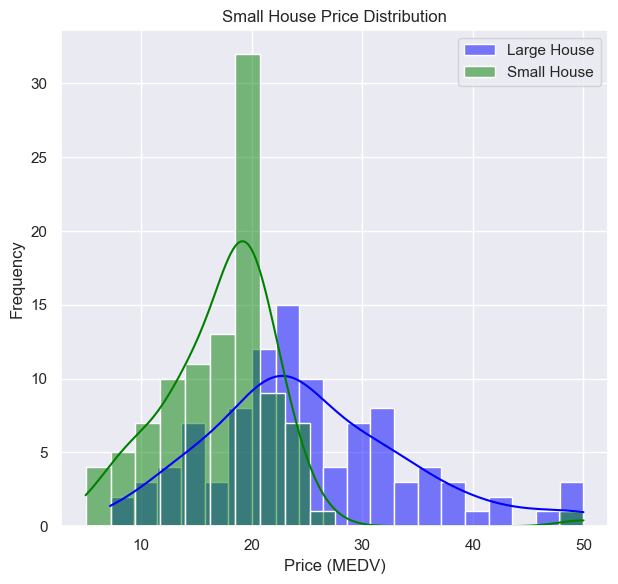

In [272]:
# ANSWER
# Set up the plot with two subplots
plt.figure(figsize=(12, 6))

# Plot histogram for Large House prices
plt.subplot(1, 2, 2)
sns.histplot(large_house_sample['MEDV'], label='Large House', bins=20, color='blue', kde=True)
plt.title('Large House Price Distribution')
plt.xlabel('Price (MEDV)')
plt.ylabel('Frequency')

# Plot histogram for Small House prices
plt.subplot(1, 2, 2)
sns.histplot(small_house_sample['MEDV'], label='Small House', bins=20, color='green', kde=True)
plt.title('Small House Price Distribution')
plt.xlabel('Price (MEDV)')
plt.ylabel('Frequency')
plt.legend(loc = 'upper right')
# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()

##### 7. Calculate Variance

Calculate variance for both samples.

In [273]:
# ANSWER
# Calculate the sample variance for Large House
variance_large_house = large_house_sample['MEDV'].var()

# Calculate the sample variance for Small House
variance_small_house = small_house_sample['MEDV'].var()

# Print the results
print(f"Sample Variance for Large Houses: {variance_large_house}")
print(f"Sample Variance for Small Houses: {variance_small_house}")

Sample Variance for Large Houses: 84.00822121212119
Sample Variance for Small Houses: 32.564099999999996


##### 8. Calculate Standard Deviation


Because we are dealing with two samples we need to compute the joint standard deviation.

Here sp is the pooled standard deviation for n = n1 = n2 and s^2
X1 and s^2 X2 are the unbiased estimators of the variances of the two samples.

![](https://wikimedia.org/api/rest_v1/media/math/render/svg/f63e99c30c01445668ea2cce9832da0f6810cb4b)

In [275]:
# ANSWER
# Standard Deviation for Large House sample
std_dev_large_house = large_house_sample['MEDV'].std()

# Standard Deviation for Small House sample
std_dev_small_house = small_house_sample['MEDV'].std()

# Print resstd_dev_small_house+ults

print(f"Standard Deviation for Large Houses: {std_dev_large_house}")
print(f"Standard Deviation for Small Houses: {std_dev_small_house}")

Standard Deviation for Large Houses: 9.165599882829339
Standard Deviation for Small Houses: 5.7064962980799345


In [276]:
#  joint standard deviation Standard  calculation option #1

std = np.sqrt((variance_large_house + variance_small_house) / 2)
print( std)

8.007170328316155


In [278]:

#  joint standard deviation Standard  calculation option #2
# Extract the 'MEDV' column (house price) for both large and small houses
large_house_data = large_house_sample['MEDV']
small_house_data = small_house_sample['MEDV']

# Calculate standard deviations for both samples
std_large_house = np.std(large_house_data, ddof=1)  # Sample standard deviation
std_small_house = np.std(small_house_data, ddof=1)  # Sample standard deviation

# Calculate sample sizes
n_large_house = len(large_house_data)
n_small_house = len(small_house_data)

# Calculate pooled standard deviation (joint standard deviation)
pooled_std = np.sqrt(((n_large_house) * std_large_house**2 + (n_small_house ) * std_small_house**2) / (n_large_house + n_small_house - 2))

# Print the result
print(f"Pooled Standard Deviation (joint standard deviation): {pooled_std}")

Pooled Standard Deviation (joint standard deviation): 7.672998742544633


##### 9. Calculate test statistic

The *t*-statistic depends on the difference between the sample means and their joint standard deviation:

![](https://wikimedia.org/api/rest_v1/media/math/render/svg/070d365e1b347ea5f83f0147043868fa120b6646)


In [284]:
# ANSWER
# Extract the 'MEDV' column for large and small houses
large_house_data = large_house_sample['MEDV']
small_house_data = small_house_sample['MEDV']

# Sample sizes
n_large = len(large_house_data)
n_small = len(small_house_data)

# Calculate the sample means
mean_large_house = np.mean(large_house_data)
mean_small_house = np.mean(small_house_data)

# Calculate the t-statistic using the formula
t_statistic = (mean_large_house - mean_small_house) / (std * np.sqrt((1/n_large) + (1/n_small)))

# Print the t-statistic
print(f"T-statistic: {t_statistic}")

T-statistic: 6.941102876844933


##### 10. Calculate Degree of Freedom

The number of degrees of freedom is the total number of samples (here, this is N from each set) minus the number of statistics in the computation (1 for each sample mean):

In [285]:
# ANSWER
numerator = (variance_large_house / n_large + variance_small_house / n_small) ** 2
denominator = ((variance_large_house / n_large) ** 2 / (n_large - 1)) + ((variance_small_house / n_small) ** 2 / (n_small - 1))
df = numerator / denominator

# Print the degrees of freedom
print(f"Degrees of Freedom: {df}")

Degrees of Freedom: 165.72485110078338


##### 11. Find the p-value

Now we can compute the probability of the above *t*-statistic from the cumulative density function:

> stats.t.cdf

> p_value = 1 - cdf(t)

In [286]:
# ANSWER

# Calculate p-value for the t-statistic from the t-distribution CDF
p_value = 1 - stats.t.cdf(np.abs(t_statistic), df)

# Print the p-value
print(f"P-value: {p_value}")

P-value: 4.188316360398403e-11


#### Interpret results

In [ ]:
# p= 4.188316360398403e-11 <<< 0.05 (alpha level), thus, the null hypothesis is reject

##### 12. Write a Function to Test Significance of `p_value`

Write a function which will take p_value and alpha as input. If p_value < alpha, print reject null hypothesis message. Otherwise print a fail to reject null hypothesis message.

In [287]:
# ANSWER
# Null hypothesis
null_hypothesis = {
    'H0': "House price does not increase for large house."
    , 'H1': "House price increases for large house."
}

In [288]:
# ANSWER
def test_significance(p_value, alpha):
    """
    Tests the significance based on p-value and alpha.

    Parameters:
    p_value (float): The p-value from the statistical test.
    alpha (float): The significance level ( 0.05).

    Returns:
    None: Prints a message based on the comparison of p-value and alpha.
    """
    if p_value < alpha:
        print("Reject the null hypothesis['H1']: There is a significant house price increase for large house")
    else:
        print("Fail to reject the null hypothesis['H0']: There is no significant house price increase for large house")

In [289]:
# ANSWER
print("t_statistic = " + str(t_statistic))
print("p_value = " + str(p_value))
test_significance(p_value, alpha)

t_statistic = 6.941102876844933
p_value = 4.188316360398403e-11
Reject the null hypothesis['H1']: There is a significant house price increase for large house


##### 13. [Bonus] Write a function to calculate t, p_value from two samples.

Calculate the T-test for the means of *two independent* samples of scores.

This is a two-sided test for the null hypothesis that 2 independent samples
have identical average (expected) values.

#### Use `Stats` Package

##### 14. Calculate the T-test for the means of *two independent* samples of scores

using following method of stats calculate the T-test for the means of two independent samples of scores.

> ttest_ind

In [292]:
# Perform independent t-test
t_stat, p_value = stats.ttest_ind(large_house_sample['MEDV'], small_house_sample['MEDV'])

# Print the t-statistic and p-value
print("t_statistic = " + str(t_stat))
print("p_value  = " + str(p_value))

# Test the significance using the scalar p-value
test_significance(p_value, alpha)  # Pass the scalar p-value directly

t_statistic = 7.27989011329426
p_value  = 7.686055825655334e-12
Reject the null hypothesis['H1']: There is a significant house price increase for large house




---



---



> > > > > > > > > © 2025 Institute of Data


---



---



